#### This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

## Problem Statement

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards


## Data dictionary
* CLIENTNUM: Client number. Unique identifier for the customer holding the account 
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer" 
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents 
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college drop-out), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio


#### What Is a Revolving Balance?

* If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


#### What is the Average Open to buy?

* 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

#### What is the Average utilization Ratio?

* The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


#### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

* ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

In [1]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import (train_test_split, 
                                     StratifiedKFold, 
                                     cross_val_score, 
                                     GridSearchCV, 
                                     RandomizedSearchCV)
from sklearn.preprocessing import StandardScaler

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier

# to suppress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
ls

BankChurners.csv            Tuning_Project-Copy1.ipynb
Business Presentation.pdf   Tuning_Project.ipynb


In [3]:
churn = pd.read_csv('BankChurners.csv')

In [4]:
# copying data to another variable to avoid any changes to original data
data = churn.copy()

### View the first and last 5 rows of the dataset.

In [5]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [6]:
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Understand the shape of the dataset.

In [7]:
data.shape

(10127, 21)

* The dataset has 10127 rows and 21 columns 

### Check the data types of the columns for the dataset.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are no null values in the data.
* 5 columns are of object type rest all are numerical.

### Summary of the dataset.

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


#### Observations:
* CLIENTNUM: It is a unique identifier for customers and can be dropped as it wouldn't add any information to our analysis.
* Customer_Age: Average age of customers is 46 years, age of customers has a wide range from 26 to 73 years.
* Dependent_count: On average the customers in the data have 2 dependents and a maximum of 5 dependents.
* Months_on_book: All the customers of the bank have at least been with them for a year and 50% of the customers for at least 3 years.
* Total_Relationship_Count: All customers use at least one product of the bank, whereas 75% of customers use 5 or fewer products of the bank.
* Months_Inactive_12_mon: On average customers were inactive for two months in the past 12 months - this shows that the bank customers are active in transactions or usage of cards it would be interesting to see if high inactivity leads to churning of a customer.
* Contacts_Count_12_mon: On average bank and customers interacted twice in the past 12 months.
* Credit_Limit: There's a huge difference between the third quartile and maximum value. The range of credit limit is very wide from 1438 to 34516, customers with high credit limit might be outliers.
* Total_Revolving_Bal: Average revolving balance of customers is 1162, there's not much difference in the third quartile and maximum value.
* Avg_Open_To_Buy: Average amount that goes unused by the customers is 7469, the range is very wide for this variable and the extreme values(min and max) might be outliers.
* Total_Amt_Chng_Q4_Q1: For 75% of the customers the transaction amount in Q4 was less than the transaction amount in Q1 (as value is equal to ~0.9).
* Total_Trans_Amt: Average transaction amount of last 12 months is 4404, some customers spent as little as 510 while some customers made the transaction of more than 18k.
* Total_Trans_Ct: On average customers made 64 or fewer transactions while 75% of the customers made 81 transactions.
* Total_Ct_Chng_Q4_Q1: For 75% of the customers the number of transactions in Q4 was less than the transactions made in Q1.
* Avg_Utilization_Ratio: On average customers used ~27% of the available credit amount of their card, with 75% of the customers utilizing 50% or less of their available credit amount.

In [10]:
data.drop(['CLIENTNUM'],axis=1,inplace=True)

In [11]:
data.describe(include=['object']).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [12]:
for i in data.describe(include=['object']).columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
***********

**Observations**
* Most of the records are for existing customers.
* Most of the bank's customers are female
* Most customers are graduates.
* Most customers are married.
* Most customers lie in the income group of less than $40k 
* Most customers have a blue card.

**Missing values**
* 'Unknown' value of Education_Level, Marital_Status, and Income_Category can be considered and treated as missing values.

### EDA

### Univariate analysis

In [13]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create a boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on Customer_Age

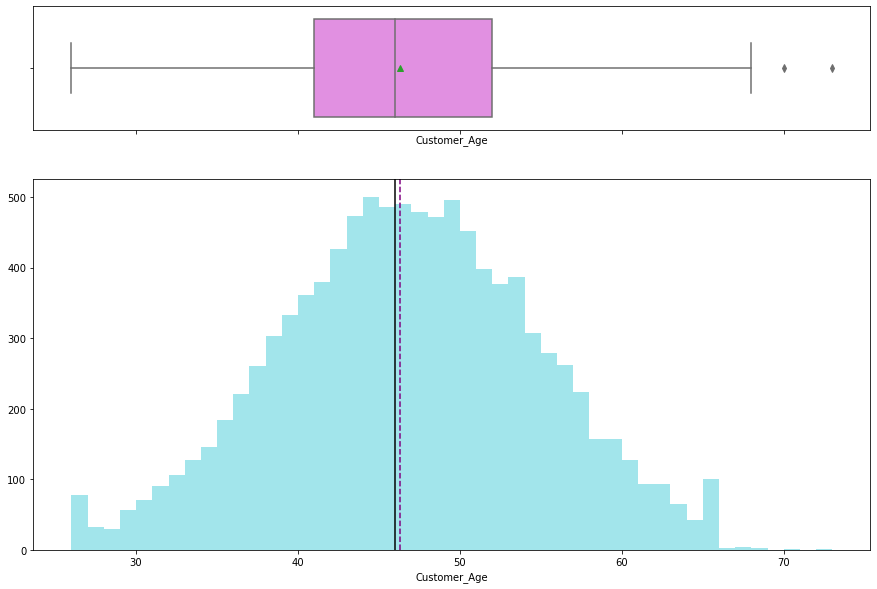

In [14]:
histogram_boxplot(data['Customer_Age'])

* The distribution of Customer_Age is normally distributed with mean and median at 46 years.
* From the boxplot, we can see that there are a few outliers.

### Observations on Months_on_book

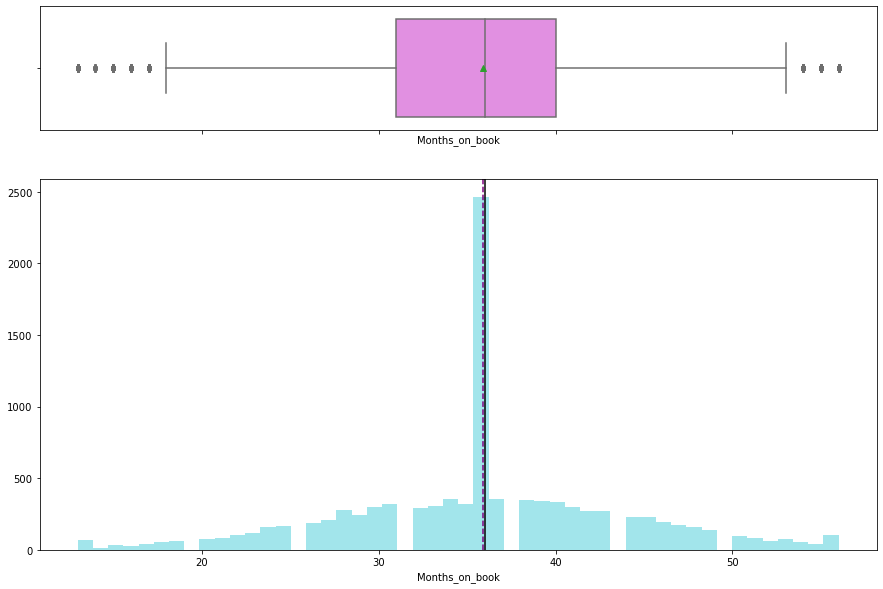

In [15]:
histogram_boxplot(data['Months_on_book'])

* Most customers are with the bank for 3 years.
* From the boxplot, we can see that there are outliers on both sides of the whiskers.

### Observations on Credit_Limit

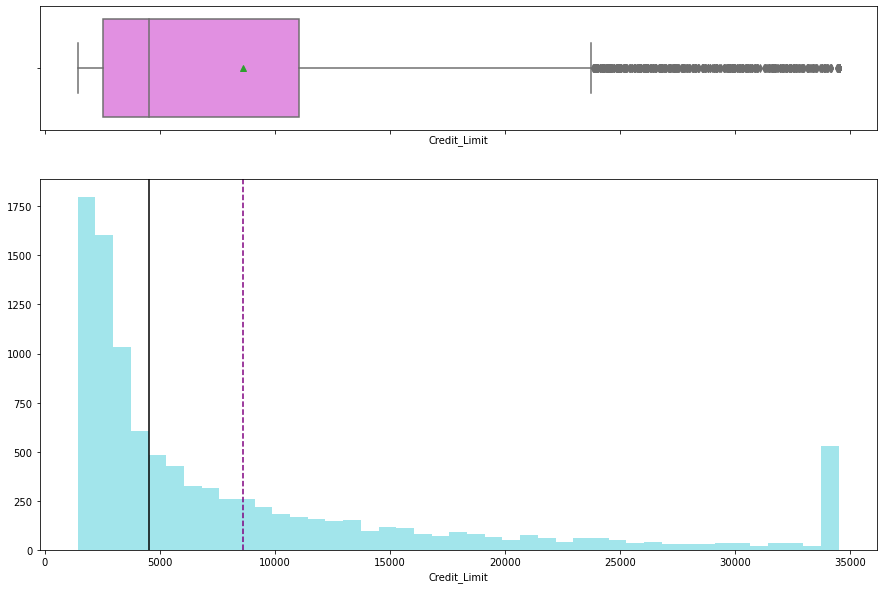

In [16]:
histogram_boxplot(data['Credit_Limit'])

* The distribution of the Credit_Limit is skewed to the right.
* There are quite a few customers with a maximum Credit Limit of 35000.
* 50% of the customers of the bank have a credit limit of less than <5000.

### Observations on Total_Revolving_Bal

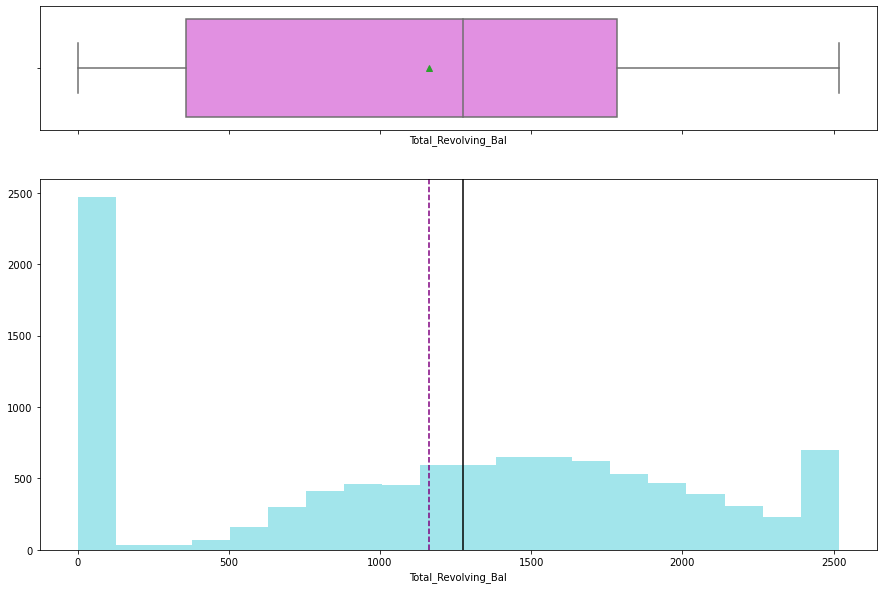

In [17]:
histogram_boxplot(data['Total_Revolving_Bal'])

* Most customers pay the complete dues of credit card and have 0 revolving balance.
* There are quite a few customers with a revolving balance of 2500.

### Observations on Avg_Open_To_Buy

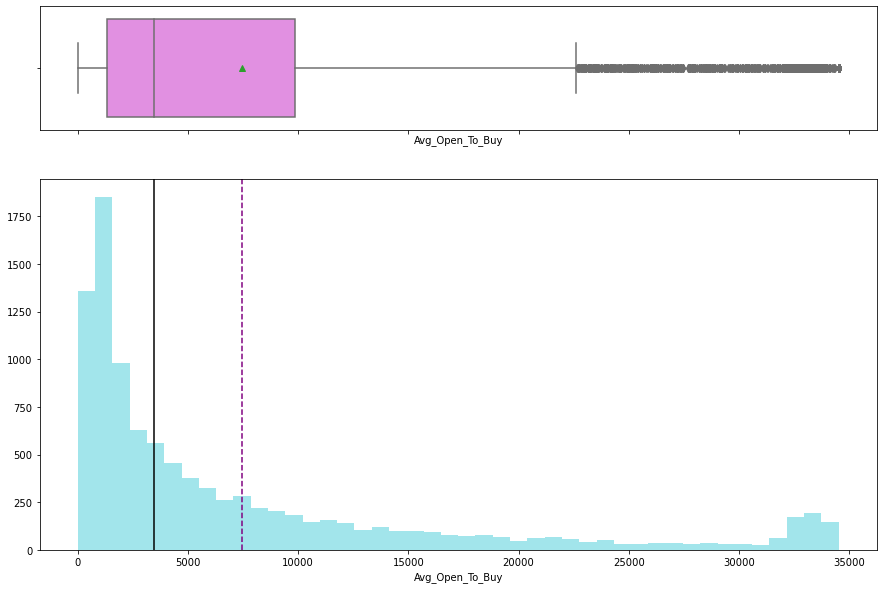

In [18]:

histogram_boxplot(data['Avg_Open_To_Buy'])

* The distribution of the Avg_Open_To_Buy column is right-skewed.
* A right-skewed distribution indicates that most customers used a big part of their limit while only a few customers (on the right tail) were left with a majority of their credit amount.

### Observations on Total_Trans_Ct

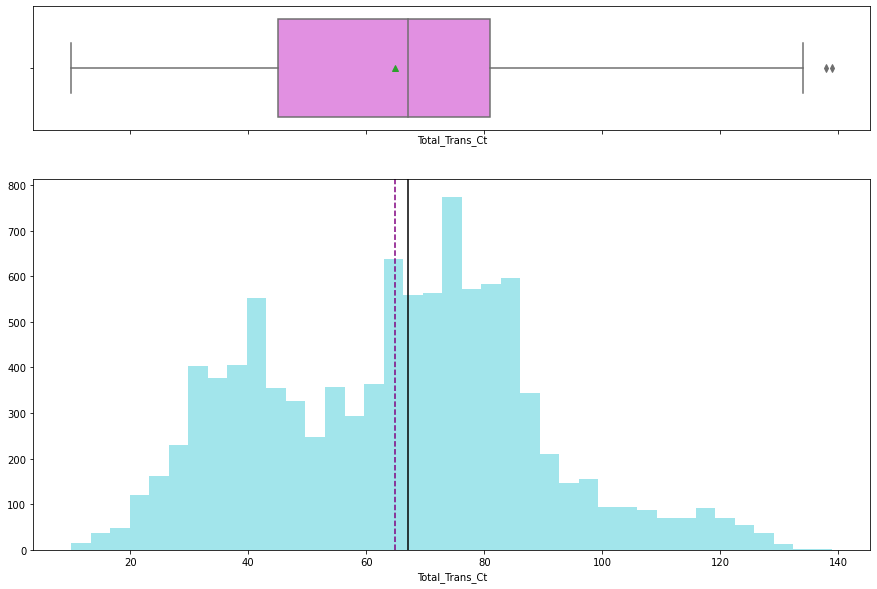

In [19]:
histogram_boxplot(data['Total_Trans_Ct'])

* The distribution of Total_Trans_Ct shows two peaks on 40 and 80 transactions in a year which indicates that customers used credit cards 3 to 6 times a month to make transactions.

### Observations on Total_Amt_Chng_Q4_Q1

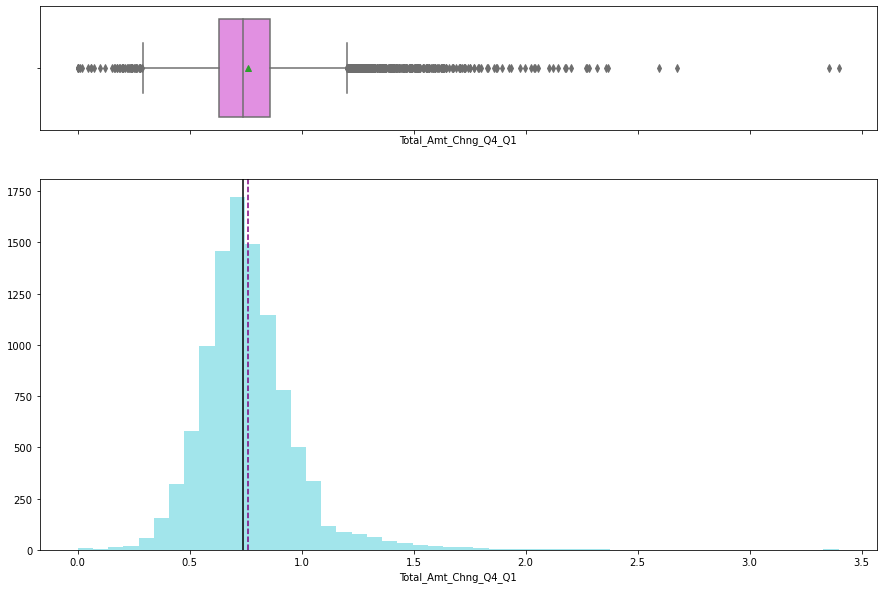

In [20]:

histogram_boxplot(data['Total_Amt_Chng_Q4_Q1'])

* The distribution of Total_Amt_Chng_Q4_Q1 looks normally distributed but there's a slight skew towards the right.
* From the boxplot, we can see that there are outliers on both sides of the whiskers.

### Observations on Total_Trans_Amt

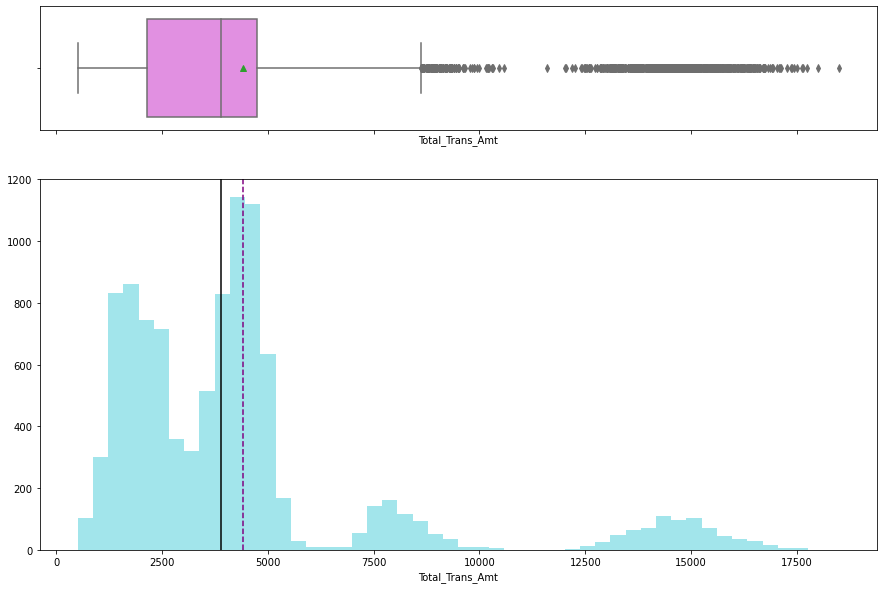

In [21]:
histogram_boxplot(data['Total_Trans_Amt'])

* The distribution of Total_Trans_Amt is skewed to the right.
* There are two peaks in data at total transaction amounts of one around 2500 and the second around the mean value of ~4500.
* From the boxplot, we can see that there are outliers - customers with more than ~8000 total transaction amounts are being considered as outliers.
* It would be interesting to check if the customers spending less with the card are the ones churning or the ones spending more are churning, if the latter is the case then there is a problem for the bank as it is losing valuable customers.

### Observations on Total_Ct_Chng_Q4_Q1

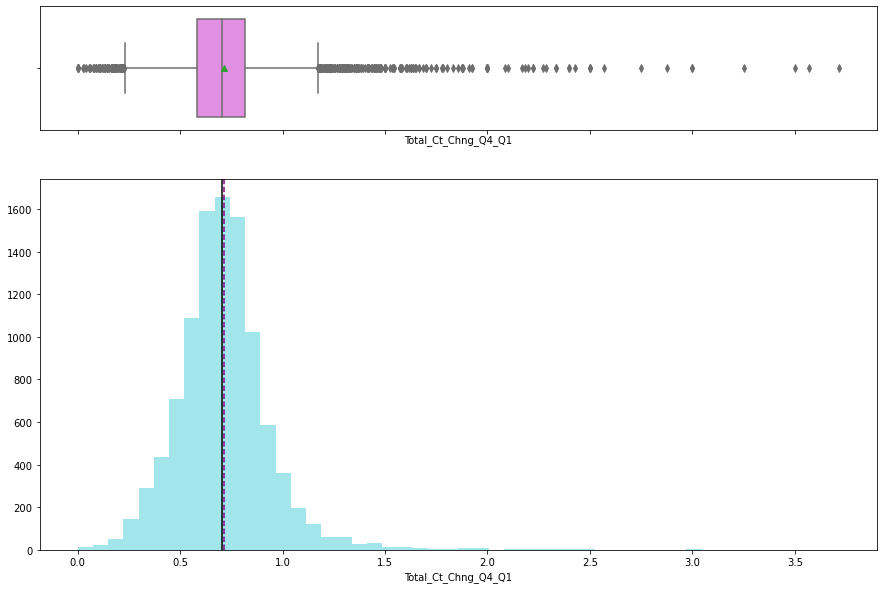

In [22]:
histogram_boxplot(data['Total_Ct_Chng_Q4_Q1'])

* The distribution of Total_Ct_Chng_Q4_Q1 looks normally distributed but there's a slight skew towards the right.
* From the boxplot, we can see that there are outliers on both sides of the whiskers.

### Observations on Avg_Utilization_Ratio

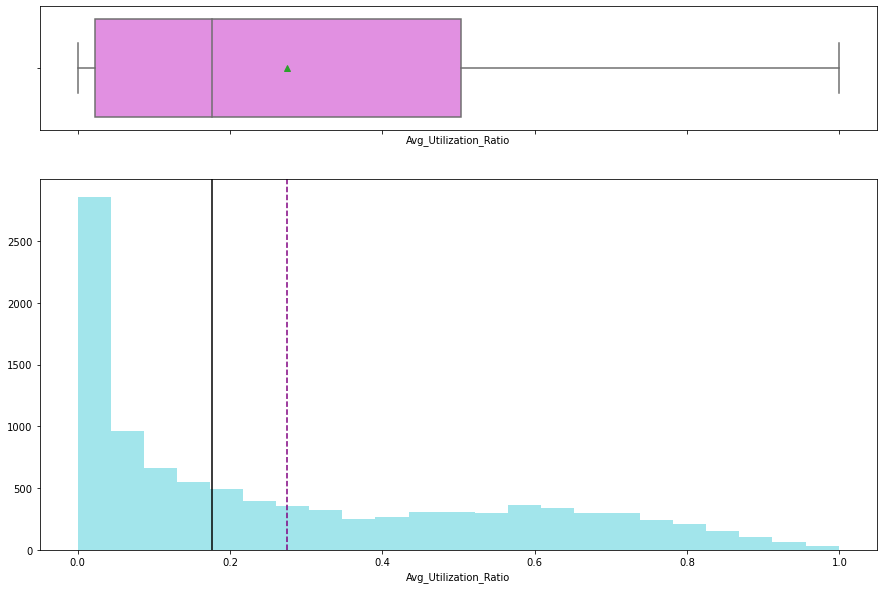

In [23]:
histogram_boxplot(data['Avg_Utilization_Ratio'])

* The distribution of Avg_Utilization_Ratio is skewed to the right.
* This distribution is not a positive sign for the bank as most of the customers are not utilizing their credit amount.

**Credit limit, Average open to buy and Average utilization ratio are right-skewed**

1. Open to buy means how much credit a customer is left with
   * Low values of Open to buy could represent either
       * Customers have low credit limits
       * Customers are spending a lot so they are left less open to buy
       

2. Average utilization ratio = (1 - (open to buy/credit limit))
   * Low values of the Average utilization ratio represents
        * (Open to buy/credit limit) is nearly equal to 1 -> Open to buy is nearly equal to the credit limit -> customers are spending less using their credit cards

3. Credit limit is also right-skewed which represents - most of the customers have low credit limits
 

Looking at the 3 variables, we can conclude that most of the customers have low credit limits and are not utilizing their credit cards much

Now this statement justifies the right skewness for all 3 variables

In [24]:
# Function to create the bar plots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in the hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on Dependent_count

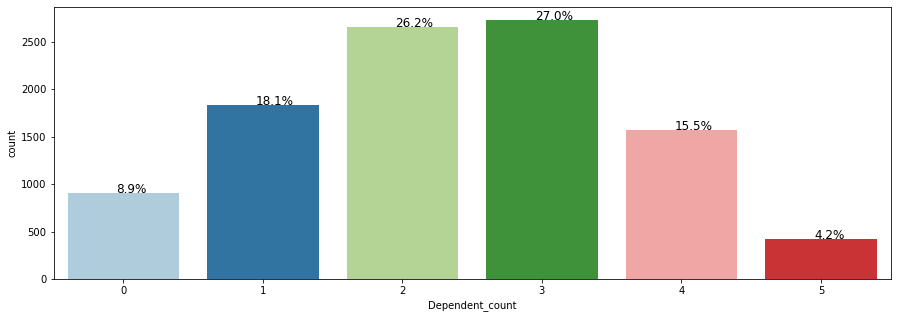

In [25]:
perc_on_bar('Dependent_count')

* The distribution of dependents is very realistic with most customers having 2 or 3 dependents.

### Observations on Total_Relationship_Count

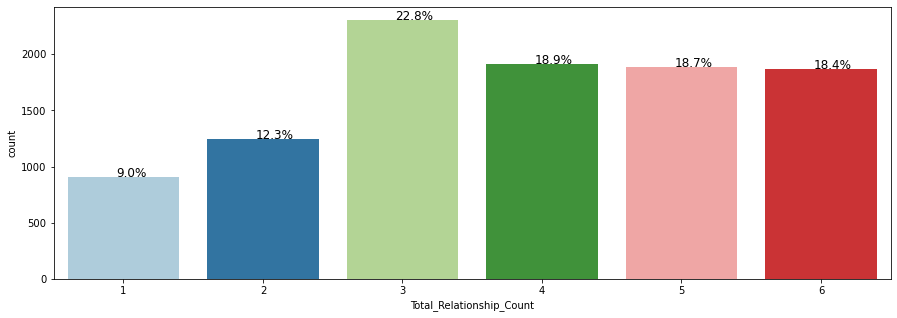

In [26]:
perc_on_bar('Total_Relationship_Count')

* 22.8% of the customers are using 3 products offered by the bank while an equal percentage ~19% of customers use 4 or more than 4 products.
* Equal percentage of customers using 4,5 and 6 products might suggest that customers who opt or buy the 4th product will also be ready to buy more products.

### Observations on Months_Inactive_12_mon

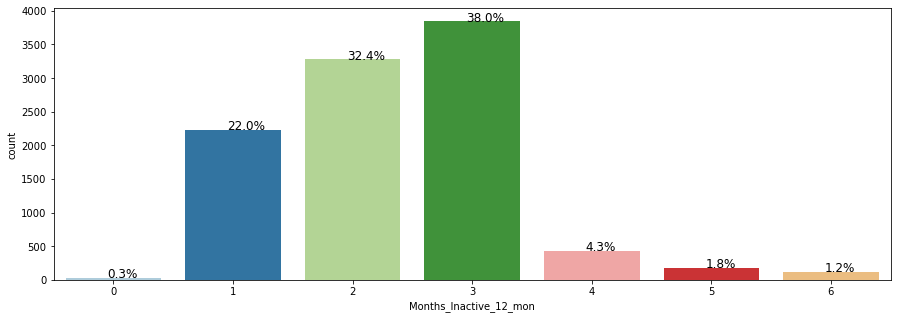

In [27]:
perc_on_bar('Months_Inactive_12_mon')

* Only 7.5% of the customers were inactive for more than 3 months.

### Observations on Contacts_Count_12_mon

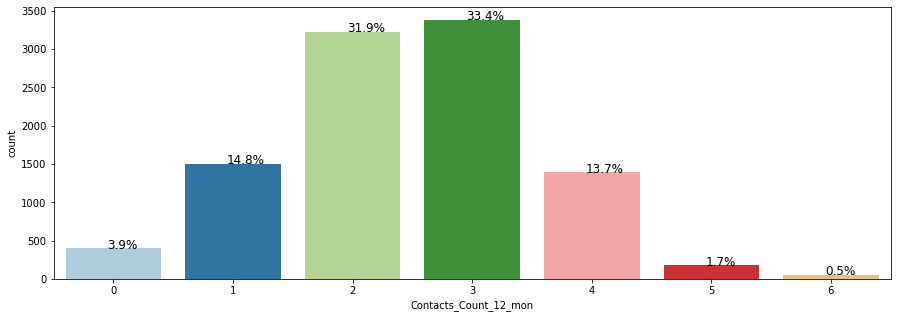

In [28]:
perc_on_bar('Contacts_Count_12_mon')

* ~16% of the customers interacted with the bank more than 3 times in the past 12 months.

### Observations on Gender

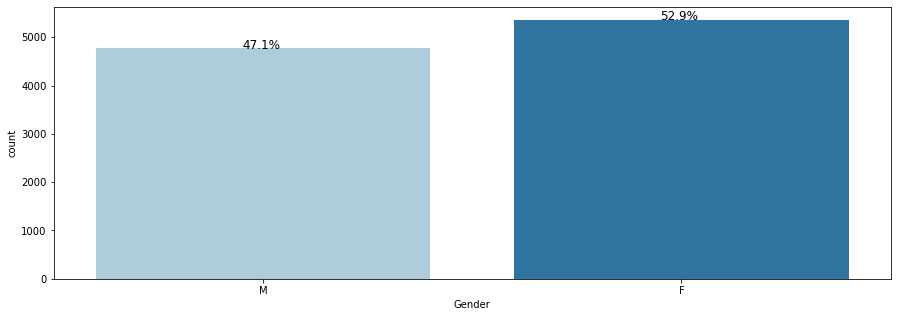

In [29]:
perc_on_bar('Gender')

* We have an almost equal percentage of Male and Female customers.

### Observations on Education_Level

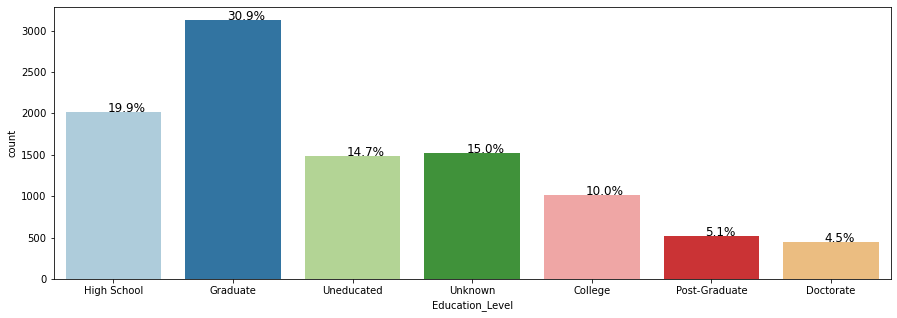

In [30]:
perc_on_bar('Education_Level')

* 30.9% of the customers are graduates, followed by 19.9% of the customers who completed high school.
* Percentage of missing value in Education_Level column - 15%.

### Observations on Marital_Status

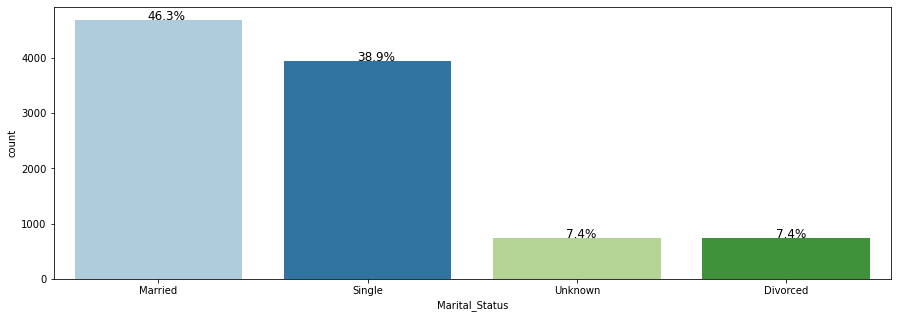

In [31]:
perc_on_bar('Marital_Status')

* 46.3% of the customers are Married, followed by 38.9% of Single customers.
* Percentage of missing value in Marital_Status column - 7.4%.

### Observations on Income_Category

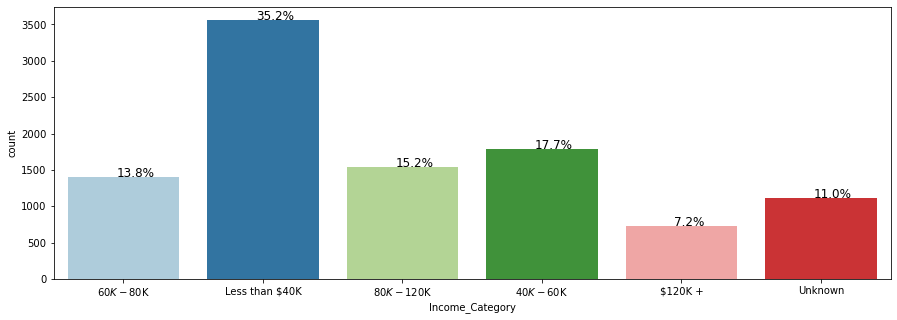

In [32]:
perc_on_bar('Income_Category')

* 35.2% of the customers lie in the Less than 40k income category group, followed by 17.7% of the customers in the 40k-60k income group.
* Percentage of missing value in Income_Category column - 11%.

### Observations on Card_Category

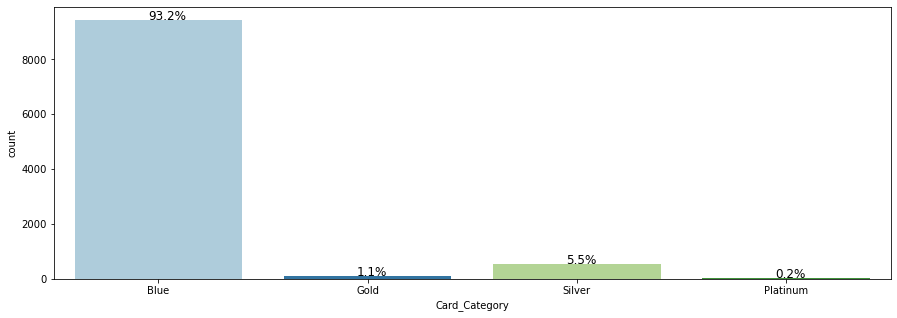

In [33]:
perc_on_bar('Card_Category')

* 93.2% of the customers have the Blue card.
* Blue card would be a standard card given by the bank to all its customers.

### Observations on Attrition_Flag

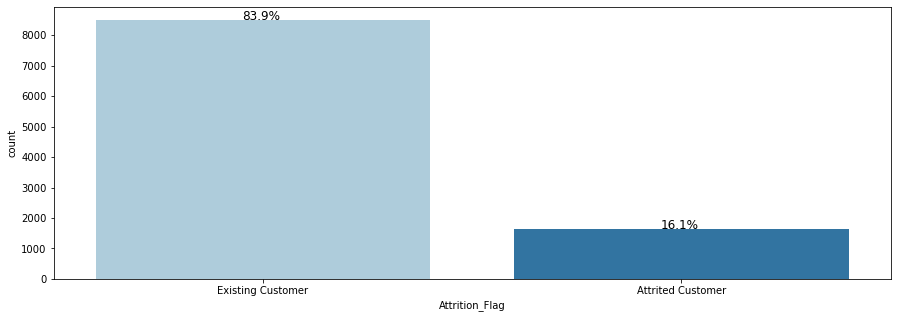

In [34]:
perc_on_bar('Attrition_Flag')

* 16.1% of the customers attrited.
* This indicates an imbalance in the data.

## Bivariate Analysis

In [35]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data['Attrition_Flag'].replace('Existing Customer',0,inplace=True)
data['Attrition_Flag'].replace('Attrited Customer',1,inplace=True)

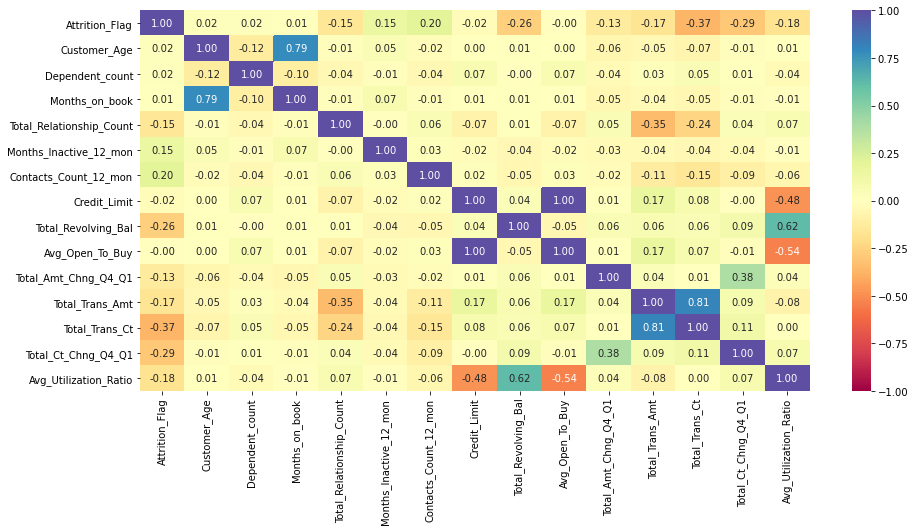

In [36]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

* Attrition_Flag shows a bit of a negative correlation with Total_Trans_Ct (total transactions) and Total_Trans_Amt (total transaction amount).
* There's a strong positive correlation between Months_on_book and Customer_Age, Total_Revolving_Bal and Avg_Utilization_Ratio, Total_Trans_Amt and Total_Trans_Ct.
* There's a negative correlation of Total_Relationship_count with Total_Trans_Amt and Total_Trans_Ct, Avg_Utilization_Ratio with Credit_Limit and Avg_Open_To_Buy.

In [37]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['Attrition_Flag'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['Attrition_Flag'],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### Attrition_Flag vs Gender

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


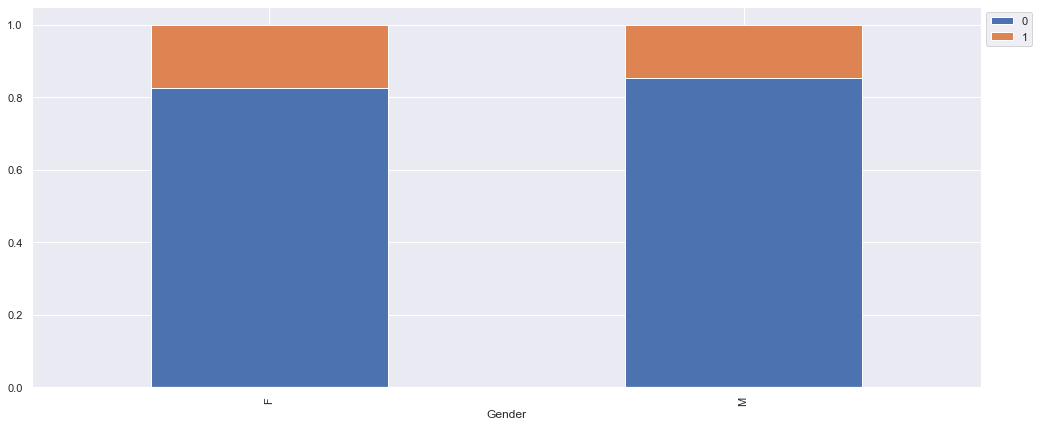

In [38]:
stacked_plot(data['Gender'])

* There's not much difference in attrition percentages for Males and Females.
* ~20% of both Males and Females attrite.

### Attrition_Flag vs Marital_Status

Attrition_Flag     0     1    All
Marital_Status                   
All             8500  1627  10127
Married         3978   709   4687
Single          3275   668   3943
Unknown          620   129    749
Divorced         627   121    748
------------------------------------------------------------------------------------------------------------------------


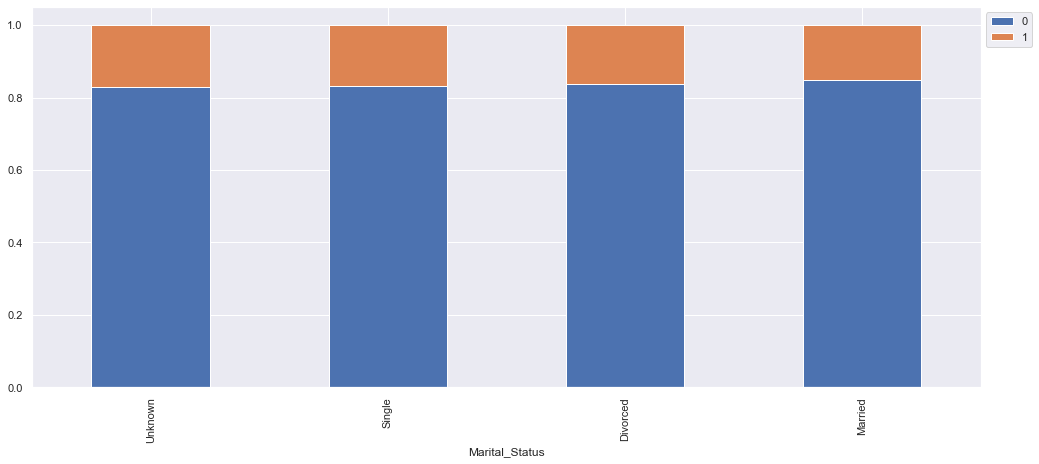

In [39]:
stacked_plot(data['Marital_Status'])

* There's not much difference in attrition percentages for Marital_Status.
* ~20% of Singles, Divorced attrite.
* Married customers attrite the least.

### Attrition_Flag vs Education_Level

Attrition_Flag      0     1    All
Education_Level                   
All              8500  1627  10127
Graduate         2641   487   3128
High School      1707   306   2013
Unknown          1263   256   1519
Uneducated       1250   237   1487
College           859   154   1013
Doctorate         356    95    451
Post-Graduate     424    92    516
------------------------------------------------------------------------------------------------------------------------


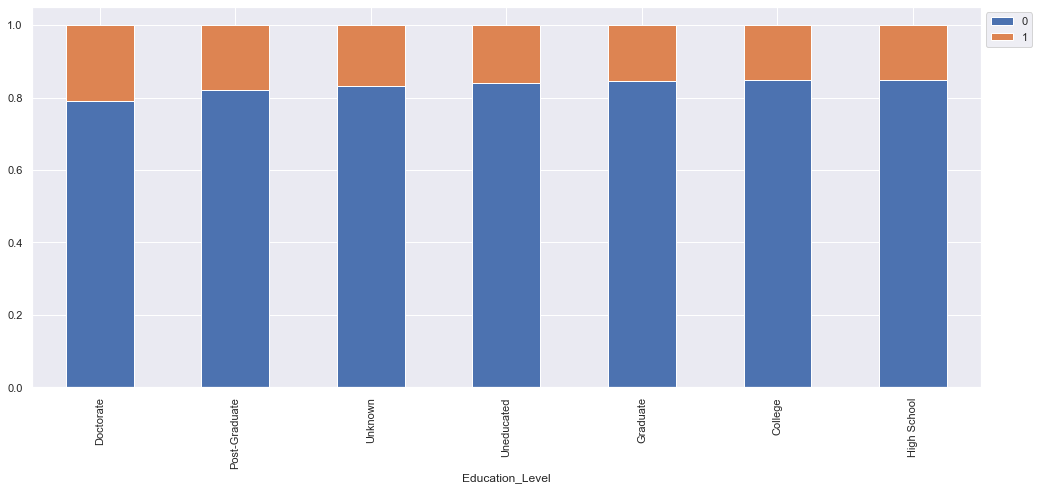

In [40]:
stacked_plot(data['Education_Level'])

* Customers with higher education -  Doctorates and Post Graduates are the ones most(~20% for both education levels) attriting.

### Attrition_Flag vs Income_Category

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
Unknown           925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


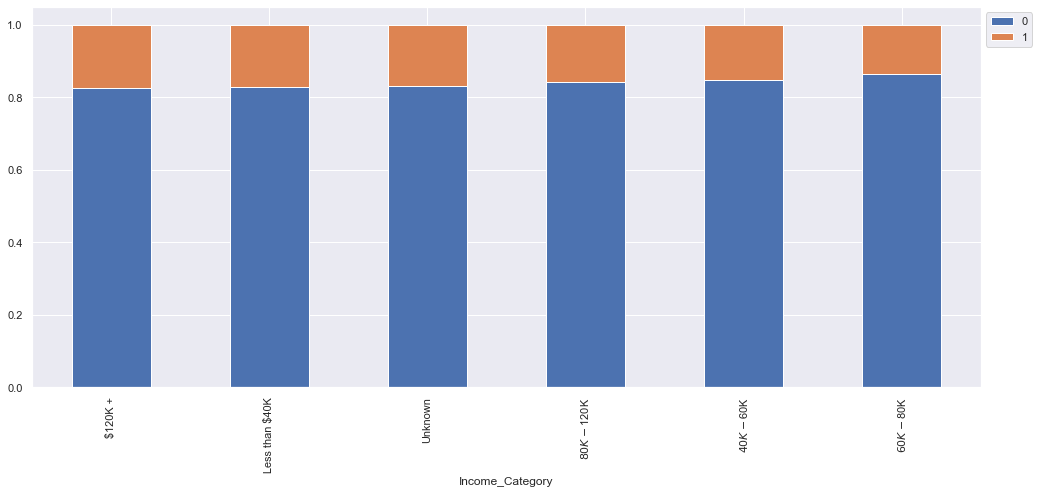

In [41]:
stacked_plot(data['Income_Category'])

* The customers from two extreme income groups - Earning less than 40K and Earning more than 120k+ are the ones attriting the most.

### Attrition_Flag vs Card_Category

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


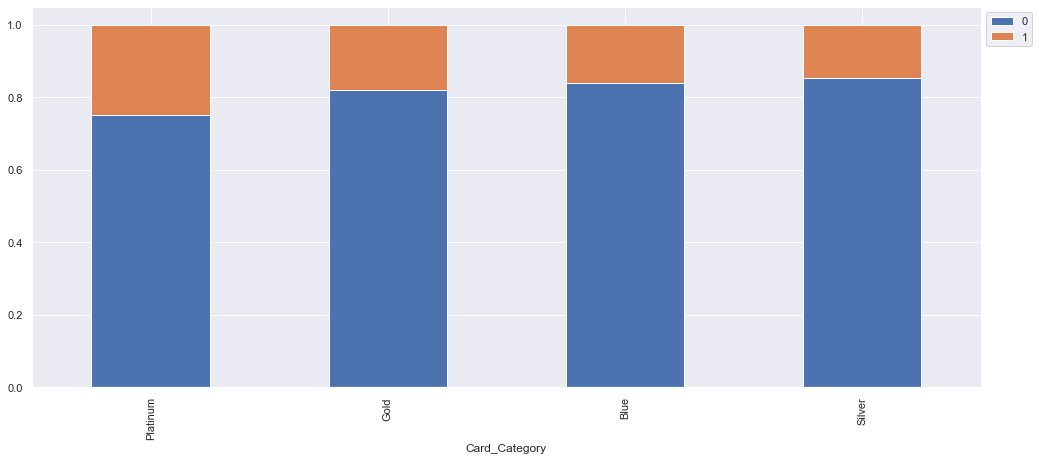

In [42]:
stacked_plot(data['Card_Category'])

* ~35% of attrition is amongst the customers with platinum cards followed by ~30% attrition in Gold cards.
* Customers with Platinum and Gold cards are our premium customers and the highest attrition for these customers is alarming as they are using the premium card provided by the bank.

### Attrition_Flag vs Contacts_Count_12_mon

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


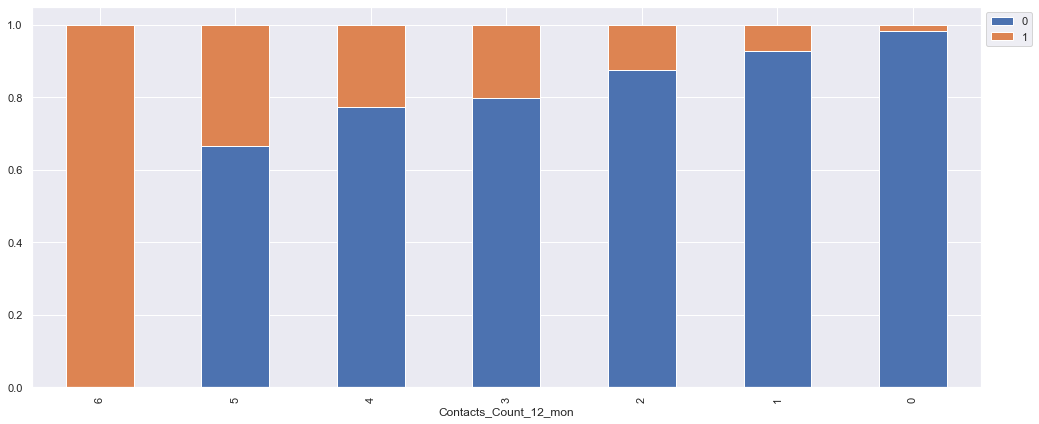

In [43]:
stacked_plot(data['Contacts_Count_12_mon'])

* Highest attrition is among the customers who interacted the most with the bank.
* This signifies that the bank is not able to resolve the problems faced by customers leading to attrition
* A preliminary step to identify attriting customers would be to look out for customers who have reached out to them repeatedly.

### Attrition_Flag vs Months_Inactive_12_mon

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


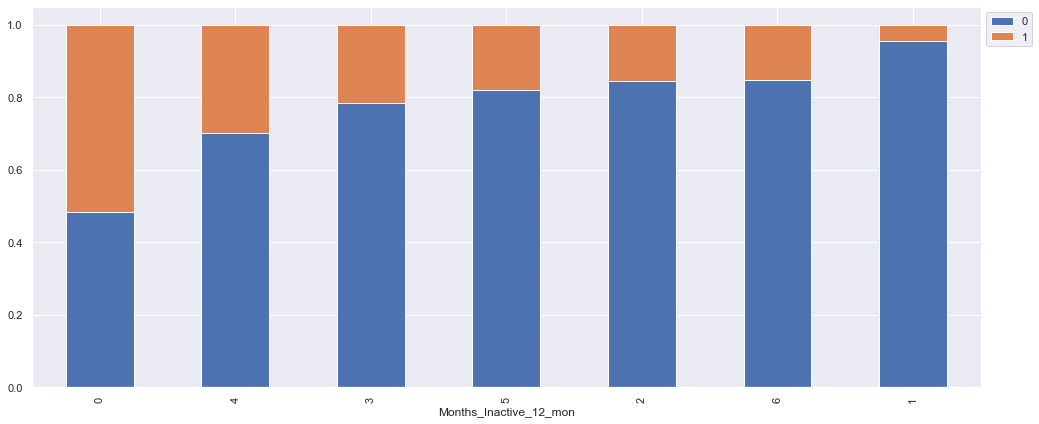

In [44]:
stacked_plot(data['Months_Inactive_12_mon'])

* As inactivity increases attrition also increases (2-4 months)
* The interpretation from here for 0 months and 6 months is difficult as customers who recently used the card attrited the most while those who were inactive for 6 months attrited less.

### Attrition_Flag vs Total_Relationship_Count

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


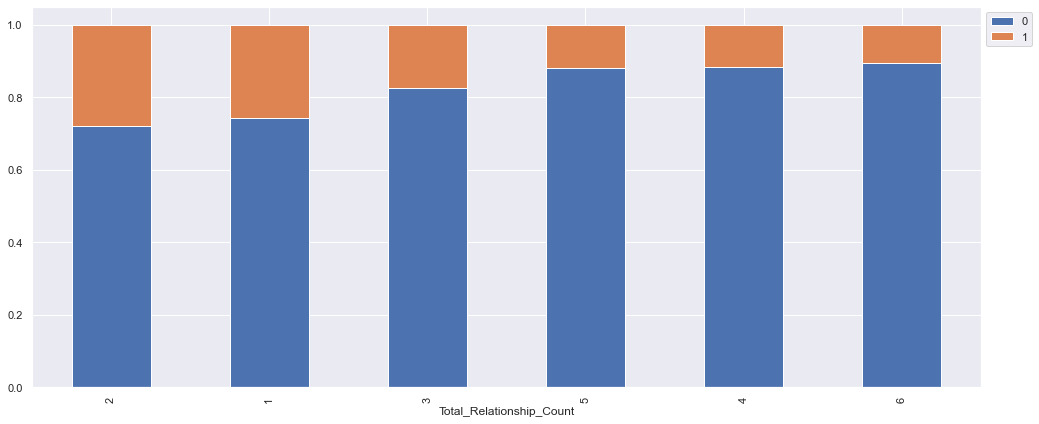

In [45]:
stacked_plot(data['Total_Relationship_Count'])

* Attrition is highest among the customers who are using 1 or 2 products offered by the bank - together they constitute ~55% of the attrition.
* Customers who use more than 3 products are the ones least attriting, such customers might be more financially stable and actively invest in different services provided by the bank.

### Attrition_Flag vs Dependent_count

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


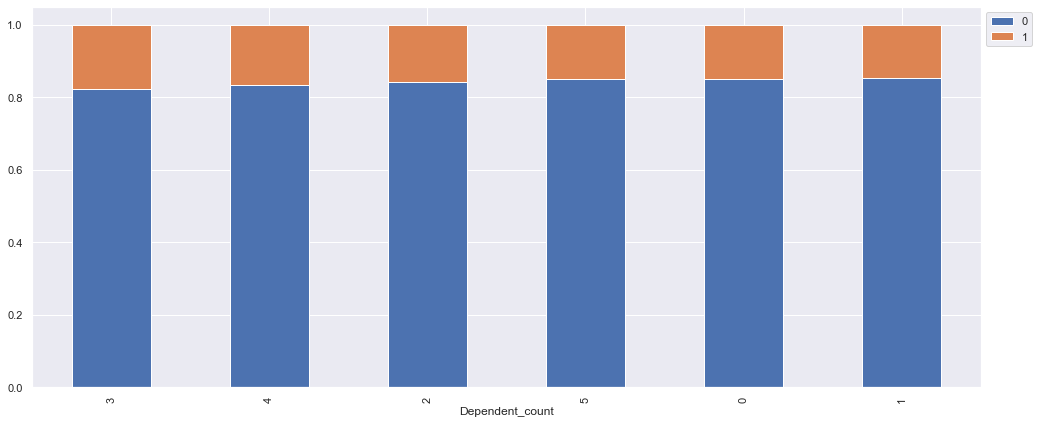

In [46]:
stacked_plot(data['Dependent_count'])

* More the number of dependents more is the attrition, more responsibilities might lead to financial instability in such customers.
* Attrition is fairly low for customers with 0 or 1 dependents.

In [47]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='Attrition_Flag'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of an Attrited Customer')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title('Distribution of an Existing Customer')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title('Boxplot w.r.t Attrition_Flag')
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot w.r.t Attrition_Flag - Without outliers')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow')
    plt.tight_layout()
    plt.show()

### Attrition_Flag vs Customer_Age

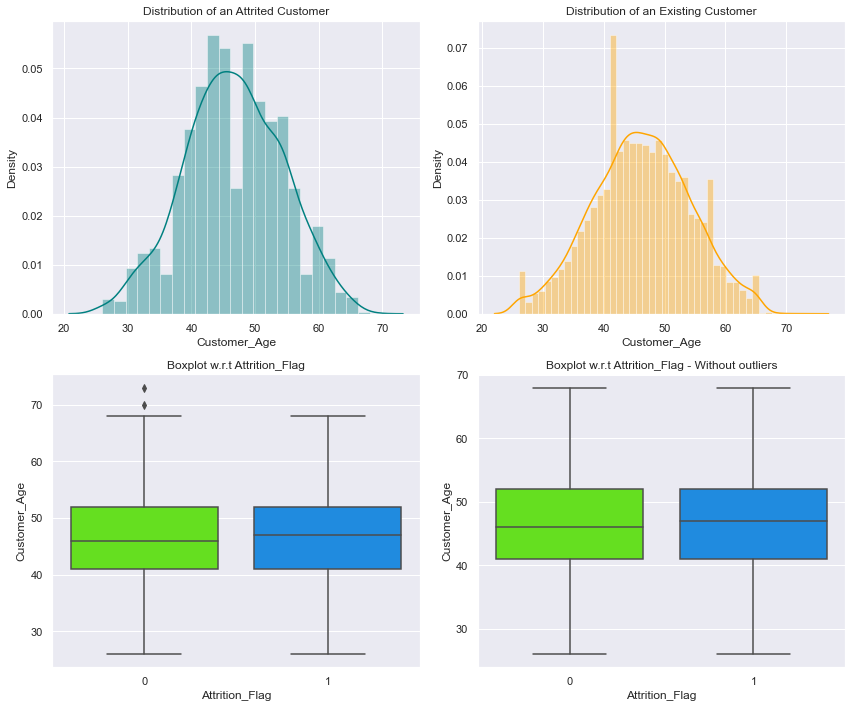

In [48]:
plot('Customer_Age')

* There's no difference in the age of customers who attrited and who didn't.

### Attrition_Flag vs Months_on_book

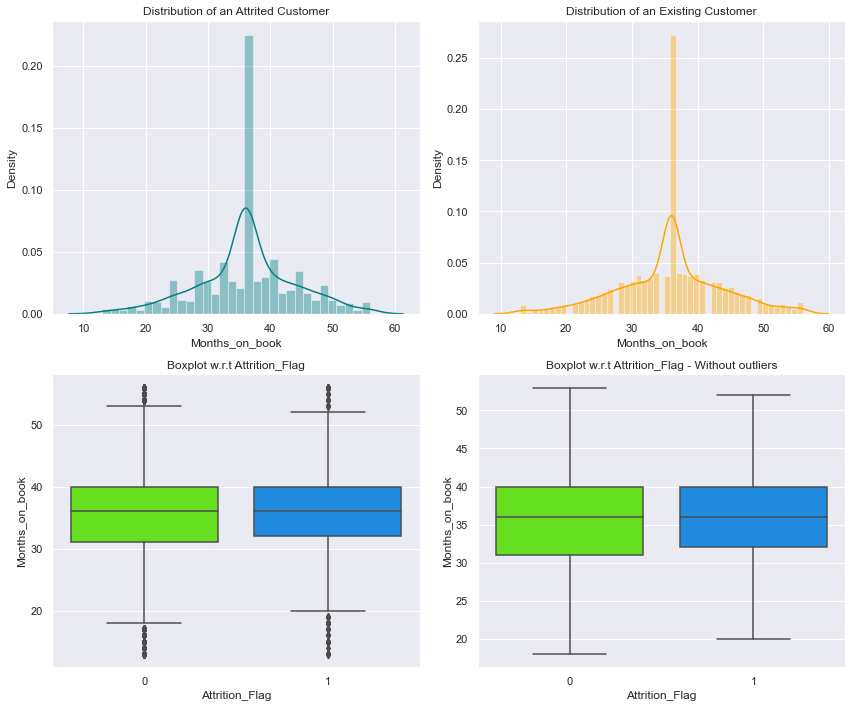

In [49]:
plot('Months_on_book')

* Tenure of relationship with the bank doesn't seem to have an impact on attrition.

### Attrition_Flag vs Credit_Limit

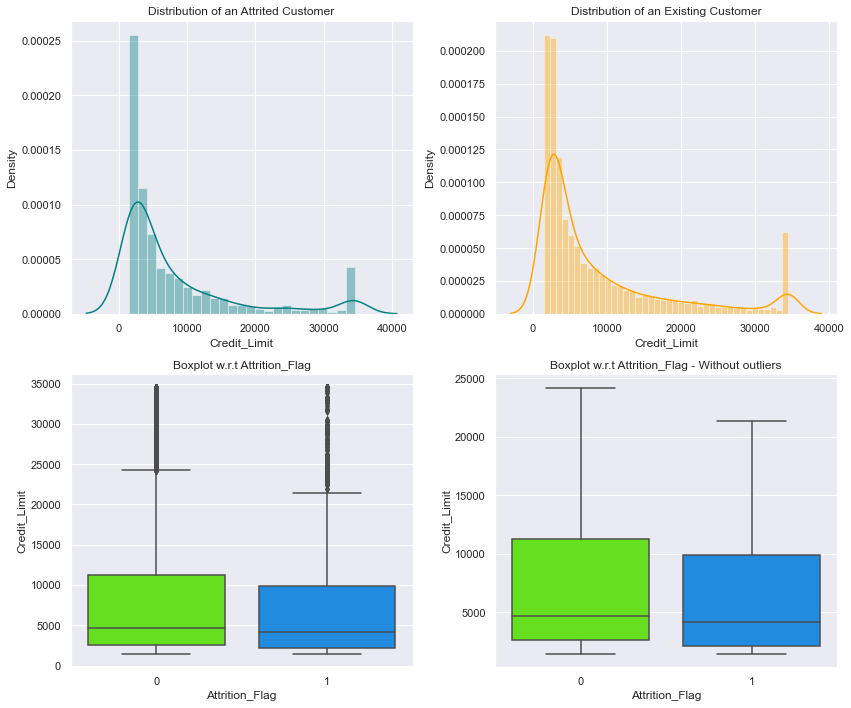

In [50]:
plot('Credit_Limit')

* Customers with lower credit limits are the ones who attrited.

### Attrition_Flag vs Total_Revolving_Bal

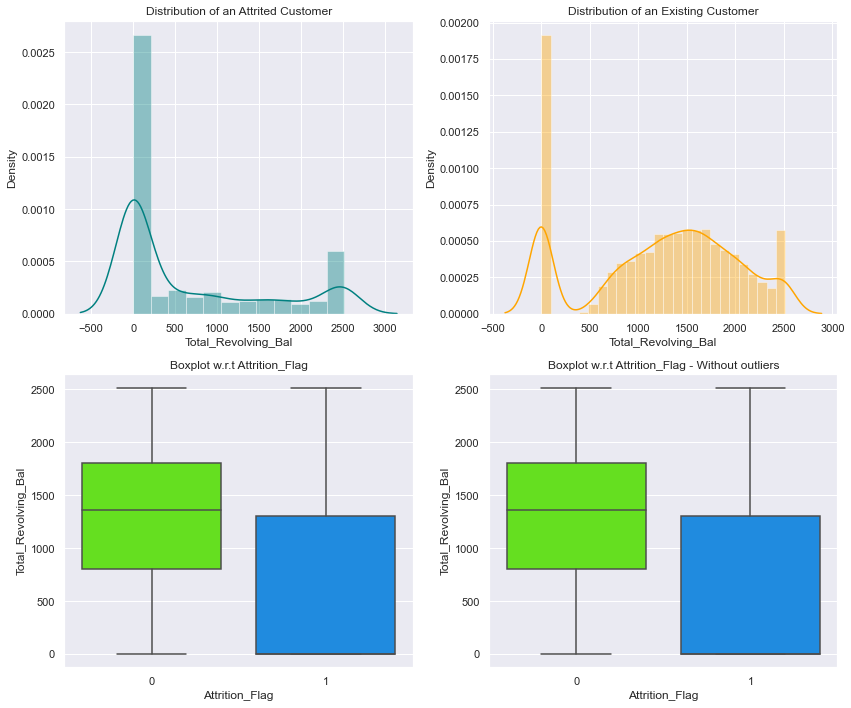

In [51]:
plot('Total_Revolving_Bal')

* Customers with less total revolving balance are the ones who attrited, such customers must have cleared their dues and opted out of the credit card service.

### Attrition_Flag vs Avg_Open_To_Buy

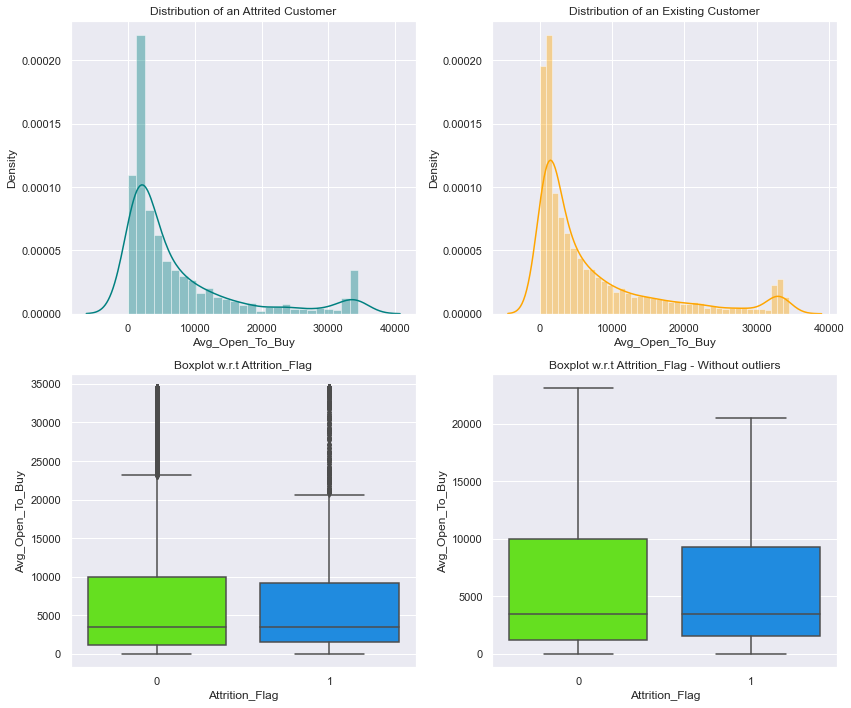

In [52]:
plot('Avg_Open_To_Buy')

* There's not much difference in the distribution for an attrited and existing customer.

### Attrition_Flag vs Total_Trans_Ct

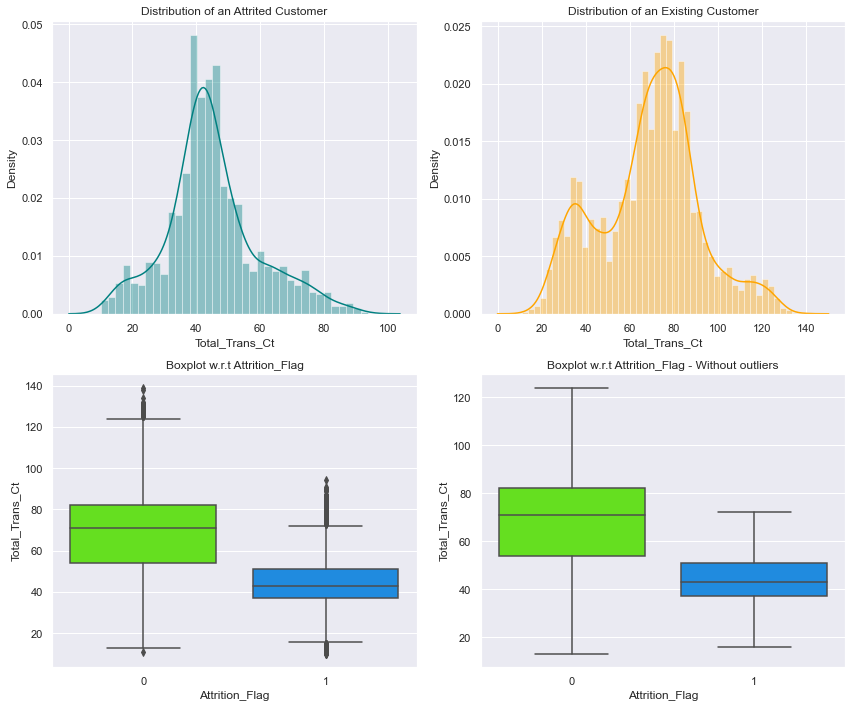

In [53]:
plot('Total_Trans_Ct')

* Less number of transactions lead to higher attrition.
* Customers with less than 80 to 100 transactions (or median transactions equal to 40) in a year should be more focused upon.

### Attrition_Flag vs Total_Trans_Amt

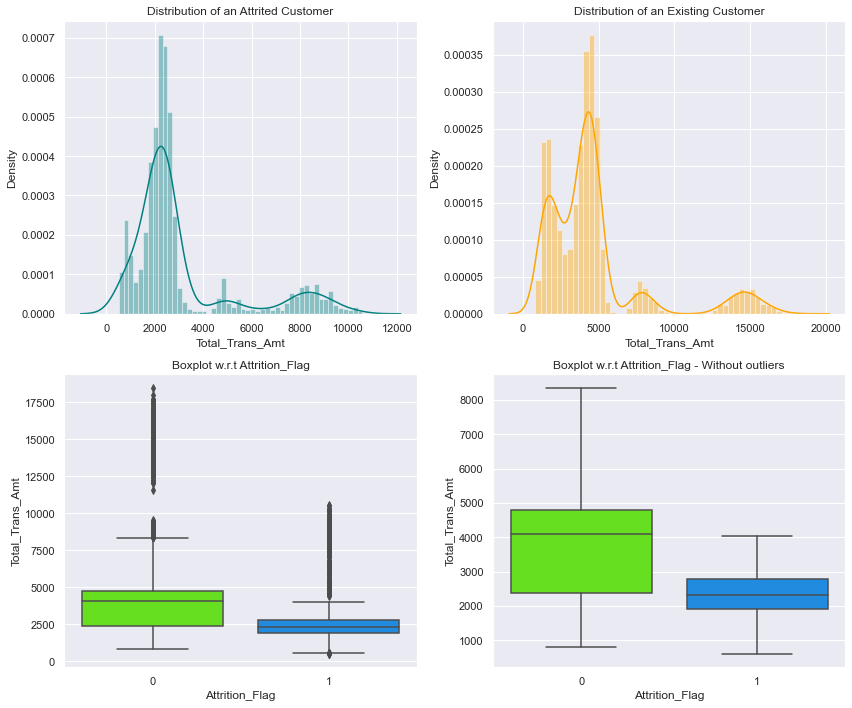

In [54]:
plot('Total_Trans_Amt')

* Less number of transactions might lead to a less transaction amount and eventually leading to customer attrition.

### Attrition_Flag vs Total_Amt_Chng_Q4_Q1

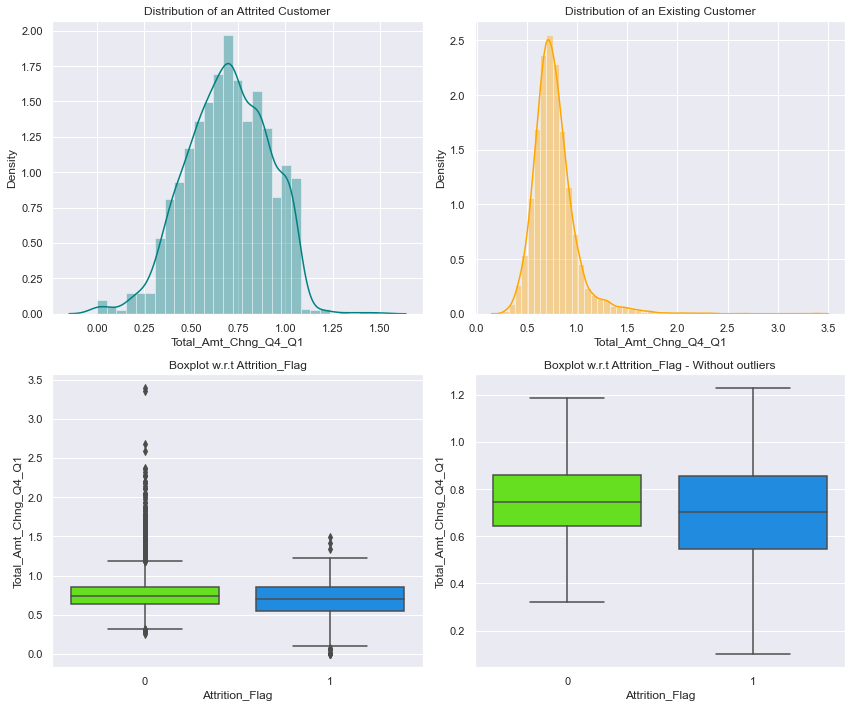

In [55]:
plot('Total_Amt_Chng_Q4_Q1')

* Customers who didn't attrite showed less variability across Q4 to Q1 as compared to the ones who attrited.

### Attrition_Flag vs Total_Ct_Chng_Q4_Q1

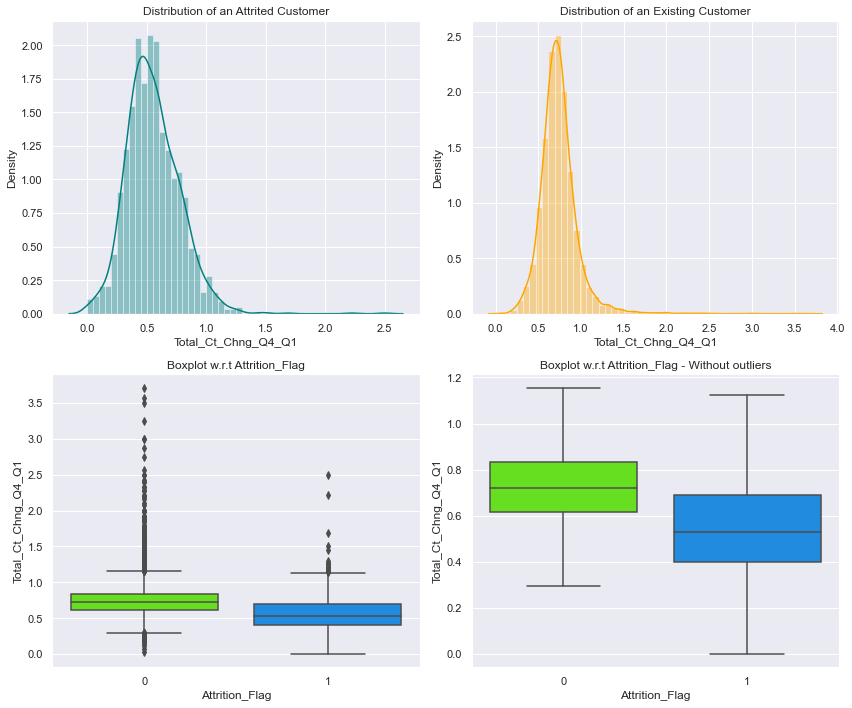

In [56]:
plot('Total_Ct_Chng_Q4_Q1')

* Customers who didn't attrite showed less variability across Q4 to Q1 as compared to the ones who attrited.

### Attrition_Flag vs Avg_Utilization_Ratio

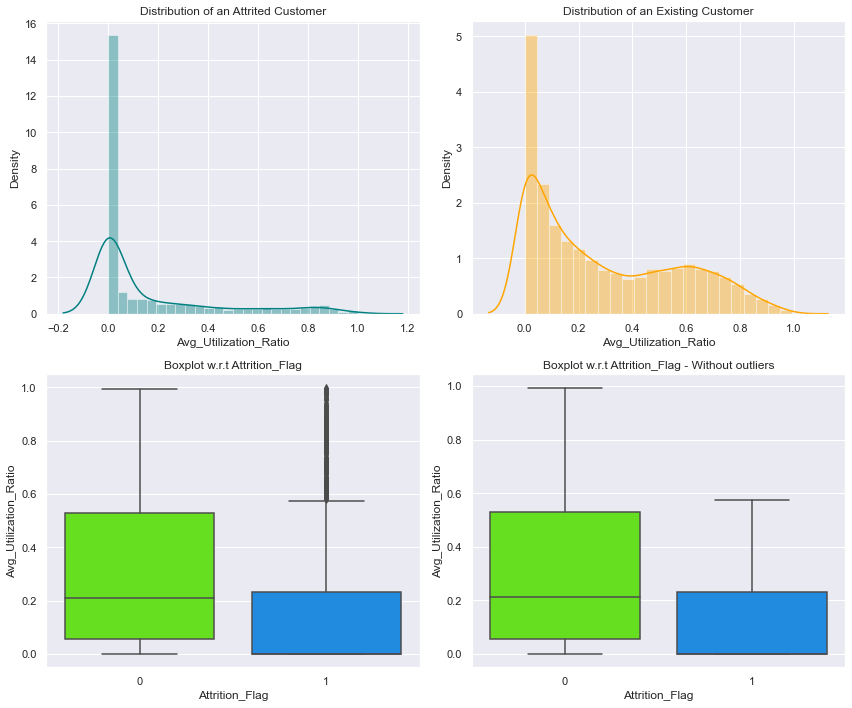

In [57]:
plot('Avg_Utilization_Ratio')

* Customers utilizing their full credit limit are the ones who didn't attrite. 
* Less utilization of the available credits indicates inactivity of customers.

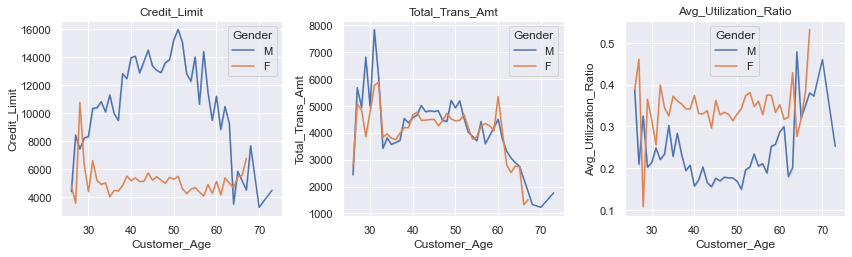

In [58]:
cols = data[['Credit_Limit','Total_Trans_Amt','Avg_Utilization_Ratio']].columns.tolist()
plt.figure(figsize=(12,10))
for i, variable in enumerate(cols):
                     plt.subplot(3,3,i+1)
                     sns.lineplot(data['Customer_Age'],data[variable],hue=data['Gender'],ci=0)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* With age the credit limit of male customers increased (till 50 years) but for the female customers the credit limit constant throughout.
* Although the credit limit for female customers is less the total transactions made by them for all age groups is the same.
* Female customers utilized their credits more as compared to the male customers where utilization dropped from 30-50 years but increased after 60 years.

### Let's find the percentage of outliers, in each column of the data, using IQR.

In [59]:
Q1 = data.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [61]:
((data.select_dtypes(include=['float64','int64'])<lower) | (data.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

Attrition_Flag             16.066
Customer_Age                0.020
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

* After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in real case scenario (in age, the total amount of transactions, number of transactions, etc) and we would want our model to learn the underlying pattern for such customers.

### Data Preparation

In [62]:
data1=data.copy()

In [63]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them
gender = {'M':0,'F':1}
data1['Gender'] = data1['Gender'].map(gender)

education_level= {'Graduate':0, 'Uneducated':1,'High School':2,'College':3,'Post-Graduate':4,'Doctorate':5}  
data1['Education_Level'] = data1['Education_Level'].map(education_level)

marital_status = {'Married':0, 'Single':1,'Divorced':2}
data1['Marital_Status'] = data1['Marital_Status'].map(marital_status)

income_category = {'Less than $40K':0,'$40K - $60K':1,'$60K - $80K':2 ,'$80K - $120K':3,'$120K +':4} 
data1['Income_Category'] = data1['Income_Category'].map(income_category)

card_category = {'Blue':0,'Silver':1,'Gold':2,'Platinum':3} 
data1['Card_Category'] = data1['Card_Category'].map(card_category)

In [64]:
data1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,2.000,0.000,2.000,0,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,0,49,1,5,0.000,1.000,0.000,0,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,0,51,0,3,0.000,0.000,3.000,0,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,0,40,1,4,2.000,NaN,0.000,0,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,0,40,0,3,1.000,0.000,2.000,0,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


* Values have been encoded.

### Missing-Value Treatment

* We will use KNN imputer to impute missing values.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.

In [65]:
imputer = KNNImputer(n_neighbors=5)

In [66]:
X = data1.drop(['Attrition_Flag'],axis=1)
y = data1['Attrition_Flag']

In [67]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)

print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [68]:
#Fit and transform the train data
X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

#Transform the test data 
X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [69]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

* All missing values have been treated.
* Let's inverse map the encoded values.

In [70]:
my_data_dict = {'Graduate':0, 'Uneducated':1,'High School':2,'College':3,'Post-Graduate':4,'Doctorate':5}  

In [71]:
# two approaches for dict reverse

In [72]:
my_reversed_dict = {}
for k, v in my_data_dict.items():
    my_reversed_dict[v]=k

In [73]:
my_reversed_dict

{0: 'Graduate',
 1: 'Uneducated',
 2: 'High School',
 3: 'College',
 4: 'Post-Graduate',
 5: 'Doctorate'}

In [74]:
{v: k for k, v in my_data_dict.items()}

{0: 'Graduate',
 1: 'Uneducated',
 2: 'High School',
 3: 'College',
 4: 'Post-Graduate',
 5: 'Doctorate'}

In [75]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [76]:
inverse_mapping(gender,'Gender')
inverse_mapping(education_level,'Education_Level')
inverse_mapping(marital_status,'Marital_Status')
inverse_mapping(income_category,'Income_Category')
inverse_mapping(card_category,'Card_Category')

* Checking inverse mapped values/categories.

In [77]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3753
M    3335
Name: Gender, dtype: int64
******************************
Graduate         2289
High School      1792
Uneducated       1526
College           805
Post-Graduate     354
Doctorate         322
Name: Education_Level, dtype: int64
******************************
Married     3443
Single      3107
Divorced     538
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2620
$40K - $60K       1508
$80K - $120K      1250
$60K - $80K       1190
$120K +            520
Name: Income_Category, dtype: int64
******************************
Blue        6619
Silver       373
Gold          81
Platinum      15
Name: Card_Category, dtype: int64
******************************


In [78]:
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3753
M    3335
Name: Gender, dtype: int64
******************************
Graduate         2289
High School      1792
Uneducated       1526
College           805
Post-Graduate     354
Doctorate         322
Name: Education_Level, dtype: int64
******************************
Married     3443
Single      3107
Divorced     538
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2620
$40K - $60K       1508
$80K - $120K      1250
$60K - $80K       1190
$120K +            520
Name: Income_Category, dtype: int64
******************************
Blue        6619
Silver       373
Gold          81
Platinum      15
Name: Card_Category, dtype: int64
******************************


* Inverse mapping returned original labels.

### Encoding categorical variables

In [79]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 29) (3039, 29)


* After encoding there are 29 columns.

In [80]:
X_train

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,35.000,3.000,30.000,5.000,3.000,4.000,13590.000,1528.000,12062.000,0.728,...,0,1,0,0,0,1,0,0,0,0
1,48.000,0.000,36.000,3.000,1.000,0.000,2708.000,2517.000,191.000,0.568,...,0,0,0,1,0,0,0,0,0,0
2,46.000,2.000,34.000,3.000,3.000,3.000,2925.000,2365.000,560.000,0.691,...,1,1,0,0,0,1,0,0,0,0
3,44.000,5.000,30.000,3.000,3.000,1.000,2709.000,1726.000,983.000,0.698,...,0,0,1,0,0,0,1,0,0,0
4,43.000,3.000,36.000,2.000,3.000,0.000,7350.000,1360.000,5990.000,0.744,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083,39.000,2.000,28.000,3.000,1.000,1.000,7093.000,2517.000,4576.000,0.745,...,0,0,1,1,0,0,0,0,0,0
7084,45.000,3.000,35.000,6.000,3.000,2.000,5065.000,1362.000,3703.000,0.680,...,0,0,0,0,1,0,0,0,0,0
7085,50.000,4.000,44.000,4.000,2.000,3.000,13911.000,2160.000,11751.000,0.730,...,0,0,0,0,1,0,0,0,0,0
7086,30.000,1.000,36.000,4.000,3.000,6.000,4541.000,0.000,4541.000,0.976,...,0,0,1,0,0,0,1,0,0,0


## Building the model

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will attrite and the customer doesn't attrite
2. Predicting a customer will not attrite and the customer attrites

### Which case is more important? 
* Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset. 

### How to reduce this loss i.e need to reduce False Negatives?
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Fist, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [81]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model: classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [82]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [87]:
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

In [89]:
pipe.steps

[('standardscaler', StandardScaler()),
 ('decisiontreeclassifier', DecisionTreeClassifier(random_state=1))]

In [93]:
estimator = DecisionTreeClassifier(random_state=1)

In [98]:
estimator.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

In [96]:
estimator.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [92]:
%%time 

# Creating pipeline
# pipe = Pipeline(steps=[("standardscaler", StandardScaler()),("decisiontreeclassifier", DecisionTreeClassifier(random_state=1))])
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {'decisiontreeclassifier__max_dephh': np.arange(2,30), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10,15],
              'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

ValueError: Invalid parameter max_dephh for estimator DecisionTreeClassifier(random_state=1). Check the list of available parameters with `estimator.get_params().keys()`.

### Logistic Regression 

In [85]:
lr = LogisticRegression(random_state=1)


In [86]:
lr.fit(X_train,y_train)

AttributeError: 'str' object has no attribute 'decode'

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [ ]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.38 to 0.50 recall.
* Let's check the performance on test data.

In [ ]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

In [ ]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

* Logistic Regression has given a generalized performance on training and test set.
* Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved.

### Oversampling train data using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

### Logistic Regression on oversampled data

In [ ]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with the training set 
log_reg_over.fit(X_train_over,y_train_over)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [ ]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set varies between 0.80 to 0.87, which is an improvement from the previous model
* The variability in the model performance has also decreased.
* Let's check the performance on the test set.

In [ ]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

* Performance of the model increased
* Lets try:

  a) Regularization to see if overfitting in precision can be reduced

  b) Undersampling the train to handle the imbalance between classes and check the model performance.

### Regularization

In [ ]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

In [ ]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

* After regularization, the recall has also been reduced.
* Let's try undersampling now.

### Undersampling train data using SMOTE

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

### Logistic Regression on undersampled data

In [ ]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validatoion` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [ ]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.76 to 0.86, which is an improvement from the initial model(without oversampling)
* The variability in results is quite large as compared to the oversampled model.
* Let's check the performance on the test set.

In [ ]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

* Model has given a generalized performance on training and test set.
* Model performance has improved using downsampling - Logistic regression is now able to differentiate well between positive and negative classes.

**We will proceed with the original data (data before over or under-sampling) as the Logistic Regression model gave a generalized performance on it.**

### Bagging and Boosting

**Let's start by building different models using KFold and cross_val_score with pipelines and tune the best model using GridSearchCV and RandomizedSearchCV**

- `Stratified K-Folds cross-validation' provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [ ]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list

models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1,)),
            ]
        ),
    )
)


models.append(
    (
        "Bagging",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("Bagging classifier", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that XGBoost is giving the highest cross-validated recall followed by GradientBoost.
- The boxplot shows that the performance of XGBoost and GBM is consistent.
- The boxplot shows that the performance of AdaBoost is also consistent (with one outlier).
- Let's tune the models see if the performance improves. 
- So, we Should tune GBM, Adaboost, XGBoost
- To reduce the time complexity, we can go ahead and tune the Bagging classifier instead of XGBoost

Note: All the models have been tuned in this notebook for the reference of learners


## Hyperparameter Tuning

* We will use pipelines with StandardScaler with bagging and boosting models and tune them using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.

* We can also use the make_pipeline function instead of Pipeline to create a pipeline.

* `make_pipeline`: This is a shorthand for the Pipeline constructor; it does not require and does not permit, naming the estimators. Instead, their names will be set to the lowercase of their types automatically.

### Hyperparameter tuning Decision Tree

#### GridSearchCV

In [ ]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {'decisiontreeclassifier__max_depth': np.arange(2,30), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10,15],
              'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

In [ ]:
# Creating new pipeline with best parameters
dtree_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        max_depth=5,
        max_leaf_nodes=15,
        random_state=1,
        min_impurity_decrease=0.0001,
        min_samples_leaf=10
    ),
)

# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)

In [ ]:
# Calculating different metrics
get_metrics_score(dtree_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned1, y_test)

- The test recall has decreased by ~4% as compared to the result from cross-validation with default parameters.
- The model is slightly overfitting the training data in terms of recall.

#### RandomizedSearchCV

In [ ]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {'decisiontreeclassifier__max_depth': np.arange(2,30), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10,15],
              'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
dtree_tuned2 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        max_depth=26,
        max_leaf_nodes=10,
        random_state=1,
        min_impurity_decrease=0.001,
        min_samples_leaf=5
    ),
)

# Fit the model on training data
dtree_tuned2.fit(X_train, y_train)

In [ ]:
# Calculating different metrics
get_metrics_score(dtree_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned2, y_test)

- Grid search took a significantly longer time than random search. This difference would further increase as the number of parameters increases.  
- The model performance improved in terms of recall for parameters given by random search. 

### Hyperparameter tuning BaggingClassifier

#### GridSearchCV

In [ ]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {
              'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

In [ ]:
# Creating new pipeline with best parameters
bagg_tuned1 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        max_features=0.8,
        max_samples=0.9,
        random_state=1,
        n_estimators=40,
    ),
)

# Fit the model on training data
bagg_tuned1.fit(X_train, y_train)

In [ ]:
# Calculating different metrics
get_metrics_score(bagg_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned1, y_test)

- The test recall has increased by ~2% as compared to the result from cross-validation with default parameters.
- The model is overfitting the training data in terms of recall.

#### RandomizedSearchCV

In [ ]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {
              'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
bagg_tuned2 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        max_features=0.8,
        random_state=1,
        max_samples=0.9,
        n_estimators=40
    ),
)

# Fit the model on training data
bagg_tuned2.fit(X_train, y_train)

In [ ]:
# Calculating different metrics
get_metrics_score(bagg_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(bagg_tuned2, y_test)

- Grid search took a significantly longer time than random search. This difference would further increase as the number of parameters increases.  
- The parameters from the random search are the same as compared to grid search.
- The model is overfitting the data for parameters given by random search.

### Hyperparameter tuning Random Forest

#### GridSearchCV

In [ ]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {
    "randomforestclassifier__n_estimators": [100,150,250],
    "randomforestclassifier__min_samples_leaf": np.arange(1, 6),
    "randomforestclassifier__max_features": [np.arange(0.3, 0.6, 0.1),'sqrt','log2'],
    "randomforestclassifier__max_samples": np.arange(0.2, 0.6, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

In [ ]:
# Creating new pipeline with best parameters
rf_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        n_estimators=250,
        max_features='sqrt',
        random_state=1,
        max_samples=0.5000000000000001,
        min_samples_leaf=1
    ),
)

# Fit the model on training data
rf_tuned1.fit(X_train, y_train)

In [ ]:
# Calculating different metrics
get_metrics_score(rf_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(rf_tuned1, y_test)

- The test recall has decreased by ~2% as compared to the result from cross-validation with default parameters.
- The model is overfitting the training data in terms of recall.

#### RandomizedSearchCV

In [ ]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "randomforestclassifier__n_estimators": [100,150,250],
    "randomforestclassifier__min_samples_leaf": np.arange(1, 6),
    "randomforestclassifier__max_features": [np.arange(0.3, 0.6, 0.1),'sqrt','log2'],
    "randomforestclassifier__max_samples": np.arange(0.2, 0.6, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
rf_tuned2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        n_estimators=250,
        max_features='sqrt',
        random_state=1,
        max_samples=0.5000000000000001,
        min_samples_leaf=1
    ),
)

# Fit the model on training data
rf_tuned2.fit(X_train, y_train)

In [ ]:
# Calculating different metrics
get_metrics_score(rf_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(rf_tuned2, y_test)

- Grid search took a significantly longer time than random search. This difference would further increase as the number of parameters increases.  
- The parameters from the random search are the same as compared grid search.
- The model is slightly overfitting the data for parameters given by random search.

### Hyperparameter tuning AdaBoost

#### GridSearchCV

In [ ]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

In [ ]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=30,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

In [ ]:
# Calculating different metrics
get_metrics_score(abc_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

- The test recall has increased by ~3% as compared to the result from cross-validation with default parameters.
* Model is slightly overfitting in terms of recall.

#### RandomizedSearchCV

In [ ]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=90,
        learning_rate=0.2,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

In [ ]:
# Calculating different metrics
get_metrics_score(abc_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

- Grid search took a significantly longer time than random search. This difference would further increase as the number of parameters increases.  
- The parameters from random search are almost the same as compared grid search except for the base estimator and estimators.
- The model is slightly overfitting the data for parameters given by random search.

### Hyperparameter tuning GradientBoosting

#### GridSearchCV

In [ ]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "gradientboostingclassifier__init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "gradientboostingclassifier__n_estimators": np.arange(75,150,25),
    "gradientboostingclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "gradientboostingclassifier__subsample":[0.5,0.7,1],
    "gradientboostingclassifier__max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

In [ ]:
# Creating new pipeline with best parameters
gbc_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        init=AdaBoostClassifier(random_state=1),
        learning_rate=0.2,
        max_features=0.5,
        n_estimators=125,
        subsample=0.5,
        random_state=1,
    ),
)

# Fit the model on training data
gbc_tuned1.fit(X_train, y_train)

In [ ]:
# Calculating different metrics
get_metrics_score(gbc_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned1, y_test)

- The test recall has increased by ~1% as compared to the result from cross-validation with default parameters.
- The model is slightly overfitting the training data in terms of recall.

#### RandomizedSearchCV

In [ ]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),GradientBoostingClassifier(random_state=1))

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "gradientboostingclassifier__init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "gradientboostingclassifier__n_estimators": np.arange(75,150,25),
    "gradientboostingclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "gradientboostingclassifier__subsample":[0.5,0.7,1],
    "gradientboostingclassifier__max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
gbc_tuned2 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        init=AdaBoostClassifier(random_state=1),
        learning_rate=0.2,
        max_features=0.5,
        n_estimators=100,
        subsample=0.7,
        random_state=1,
    ),
)

# Fit the model on training data
gbc_tuned2.fit(X_train, y_train)

In [ ]:
# Calculating different metrics
get_metrics_score(gbc_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned2, y_test)

- Grid search took a significantly longer time than random search. This difference would further increase as the number of parameters increases.  
- The parameters from the random search are the same as compared to grid search.
- The model is slightly overfitting the data for parameters given by random search.

### Hyperparameter tuning XGBoost

#### GridSearchCV

In [ ]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=250,
        scale_pos_weight=10,
        subsample=0.7,
        learning_rate=0.01,
        gamma=3,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

In [ ]:
# Calculating different metrics
get_metrics_score(xgb_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

- The test recall has increased by ~7% as compared to the result from cross-validation with default parameters.
* Model has given a generalized performance on training and test set.

#### RandomizedSearchCV

In [ ]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in RandomSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=150,
                scale_pos_weight=10,
                learning_rate=0.05,
                gamma=3,
                subsample=0.7,
                eval_metric='logloss',
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

In [ ]:
# Calculating different metrics
get_metrics_score(xgb_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

- Grid search took a significantly longer time than random search. This difference would further increase as the number of parameters increases.  
- The parameters from random search are significantly different as compared to grid search.
- The model has given a generalized performance on training and test set.

In [ ]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [ ]:
# defining list of models
models = [log_reg_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [ ]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [ ]:
# defining list of models
models = [dtree_tuned1,dtree_tuned2,bagg_tuned1,bagg_tuned2,rf_tuned1,rf_tuned2,abc_tuned1,abc_tuned2,gbc_tuned1,gbc_tuned2,xgb_tuned1, xgb_tuned2]


# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression",
            'Logistic Regression on Oversampled data',
            'Logistic Regression-Regularized (Oversampled data)',
            'Logistic Regression on Undersampled data',
            "Decision Tree with GridSearchCV",
            "Decision Tree with RandomizedSearchCV",
            "Bagging Classifier with GridSearchCV",
            "Bagging Classifier with RandomizedSearchCV",
            "Random Forest with GridSearchCV",
            "Random Forest with RandomizedSearchCV",
            "AdaBoost with GridSearchCV",
            "AdaBoost Tree with RandomizedSearchCV",
            "GradientBoost with GridSearchCV",
            "GradientBoost Tree with RandomizedSearchCV",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of Test recall
comparison_frame

- The xgboost model tuned using RandomizedSearchCV is giving the best test recall of 0.95 and overall generalized performance.
- Let's see the feature importance from the tuned xgboost model

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Total_Trans_Ct is the most important variable in predicting credit card churn followed by Total_Revolving_Bal, Total_Trans_Amt, Total_Relationship_Count, and Total_Ct_Chng_Q4_Q1.

## Business Recommendations

* We have been able to build a predictive model:

  a) that bank can deploy this model to identify customers who are at the risk of attrition.
  
  b) that the bank can use to find the key causes that drive attrition. 
  
  c) based on which bank can take appropriate actions to build better retention policies for customers.
  

* Factors that drive the attrition - Total_Trans_Ct, Total_Revolving_Bal, Total_Trans_Amt, Total_Relationship_Count
* Total_Trans_Ct: Less number of transactions in a year leads to attrition of a customer - to increase the usage of cards the bank can provide offers like cashback, special discounts on the purchase of something, etc so that customers feel motivated to use their cards.

* Total_Revolving_Bal: Customers with less total revolving balance are the ones who attrited, such customers must have cleared their dues and opted out of the credit card service. After the customer has cleared the dues bank can ask for feedback on their experience and get to the cause of attrition.

* Total_Trans_Amt: Less number of transactions can lead to less transaction amount and eventually leads to customer attrition - Bank can provide offers on the purchase of costlier items which in turn will benefit the customers and bank both.

* Total_Relationship_Count: Attrition is highest among the customers who are using 1 or 2 products offered by the bank - together they constitute ~55% of the attrition - Bank should investigate here to find the problems customers are facing with these products, customer support, or more transparency can help in retaining customers.

* Female customers should be the target customers for any kind of marketing campaign as they are the ones who utilize their credits, make more and higher amount transactions. But their credit limit is less so increasing the credit limit for such customers can profit the bank.

* Months_Inactive: As inactivity increases the attrition also increases, 2-4 months of inactivity are the biggest contributors of attrition -Bank can send automated messages to engage customers, these messages can be about their monthly activity, new offers or services, etc.

* Highest attrition is among the customers who interacted/reached out the most with/to the bank, This indicates that the bank is not able to resolve the problems faced by customers leading to attrition - a feedback collection system can be set up to check if the customers are satisfied with the resolution provided, if not, the bank should act upon it accordingly.